In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../case-hosp-death.csv")
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-03,1,6.0,NaN
2020-03-04,5,10.0,NaN
2020-03-05,3,15.0,NaN
2020-03-06,7,11.0,NaN
2020-03-07,7,10.0,NaN


Text(0.5, 1.0, 'Cases/day')

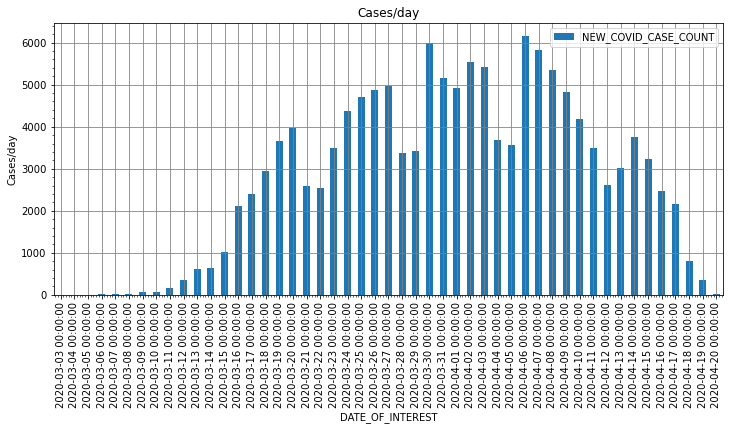

In [5]:
fig, ax = pltdflt(figsize=(12,5))
dat[["NEW_COVID_CASE_COUNT"]].plot(kind="bar", ax=ax)
plt.grid(False, which="minor")
plt.ylabel("Cases/day")
plt.title("Cases/day")

In [6]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()

Text(0.5, 1.0, 'Cases/day, 7 day average')

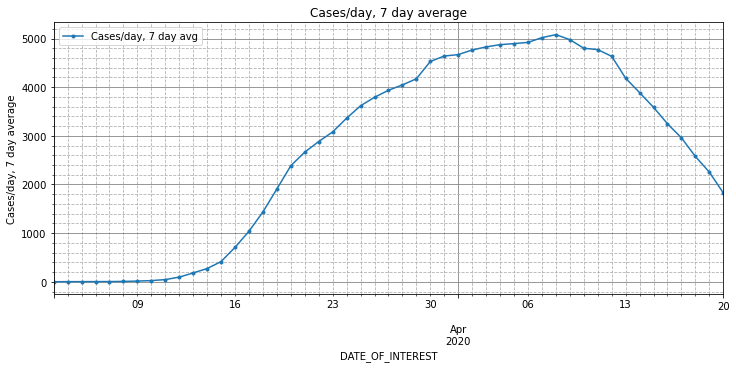

In [7]:
fig, ax = pltdflt(figsize=(12,5))

dat[["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

In [8]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [9]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [10]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg")

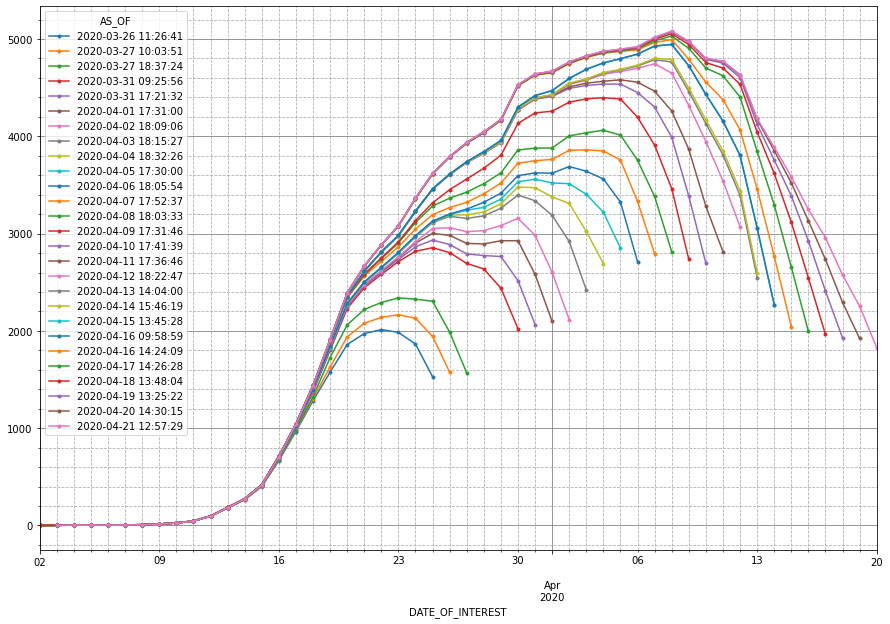

In [11]:
fig, ax = pltdflt((15,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

In [12]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Deaths/day, 7 day avg")

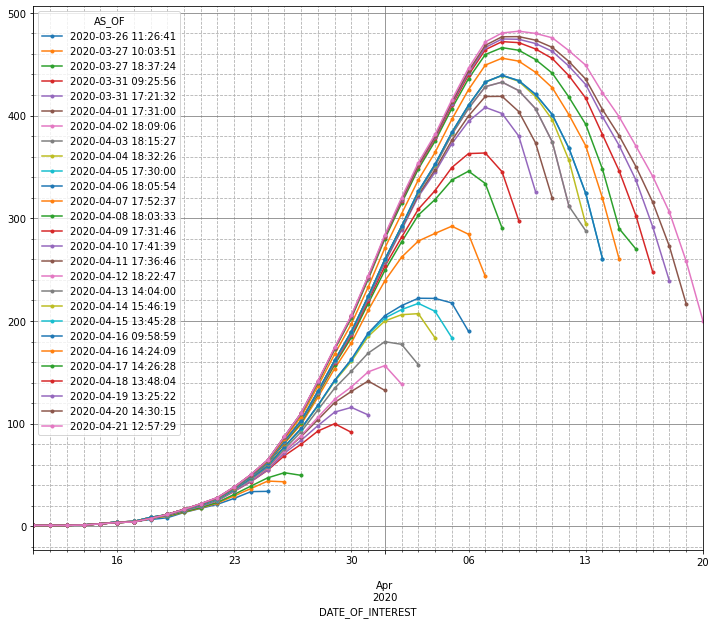

In [13]:
fig, ax = pltdflt()
dp.plot(style=".-", ax=ax)

In [14]:
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()

In [15]:
df = hdat.groupby("DATE_OF_INTEREST").diff()
df["DATE_OF_INTEREST"] = hdat["DATE_OF_INTEREST"]
df["AS_OF"] = hdat["AS_OF"]
df["Days"] = hdat["Days"]

In [16]:
d2 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="Deaths/day, 7 day avg")

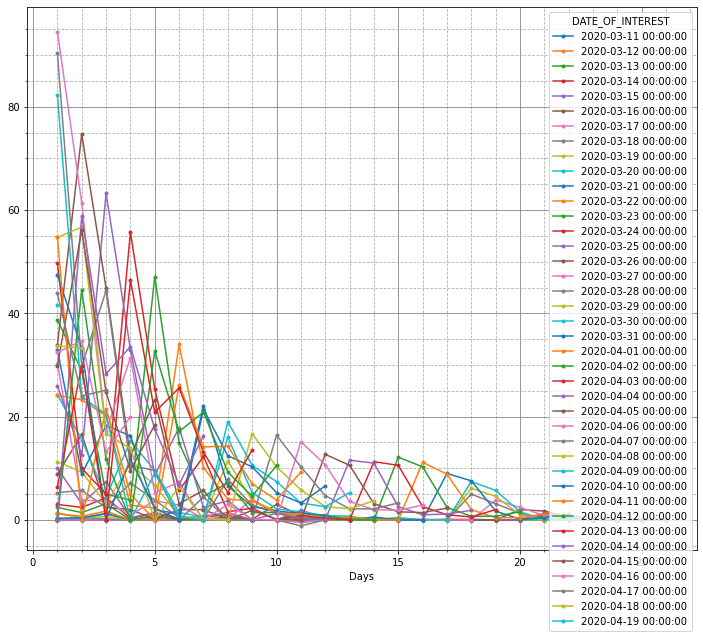

In [17]:
fig, ax = pltdflt()
d2.plot(style=".-", ax=ax)

In [18]:
d3 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="NEW_COVID_CASE_COUNT")

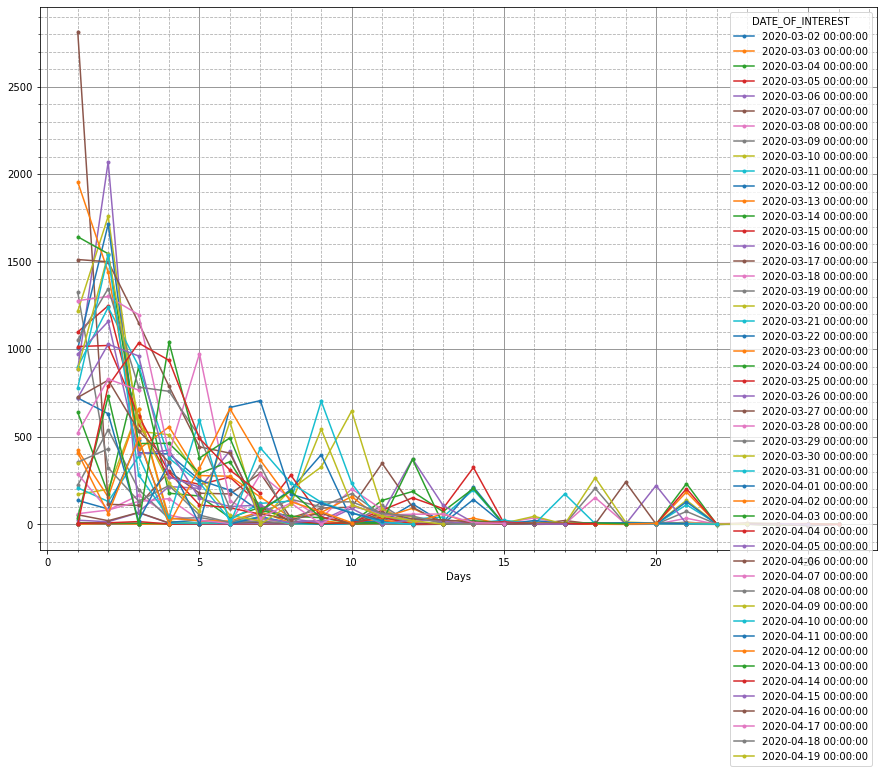

In [19]:
fig, ax = pltdflt(figsize=(15,10))
d3.plot(style=".-", ax=ax)

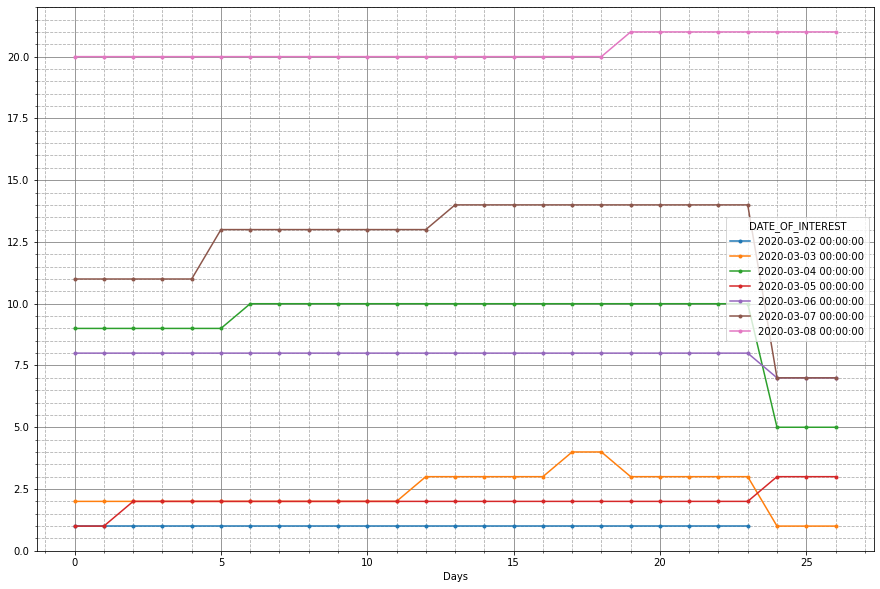

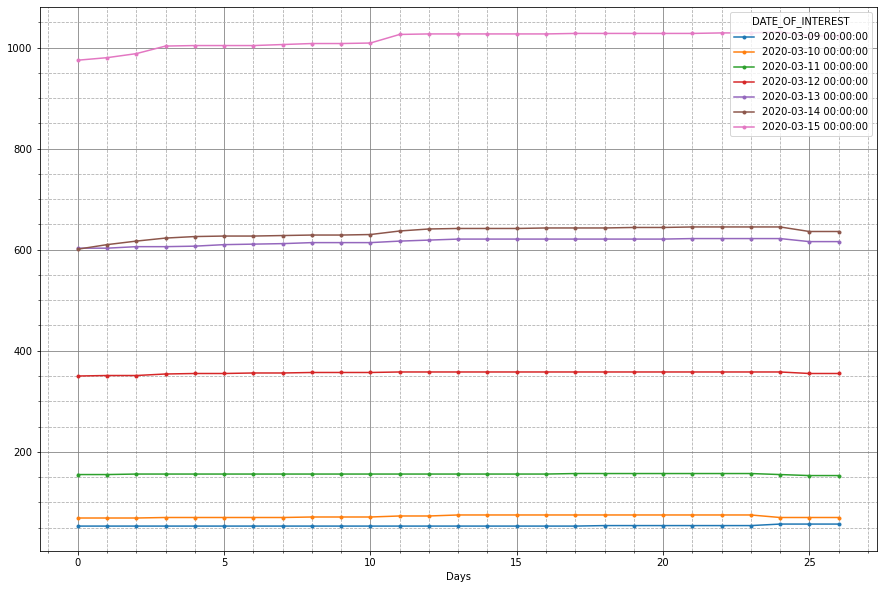

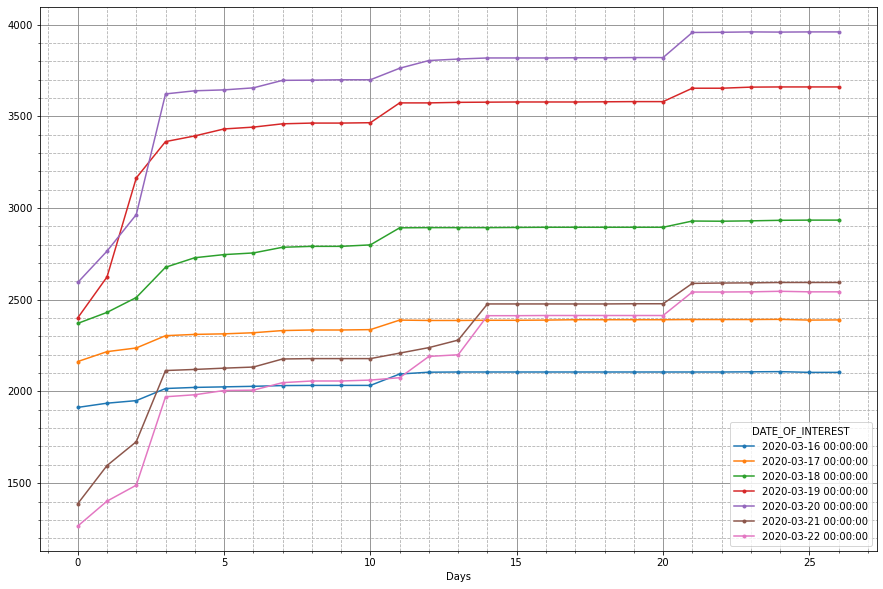

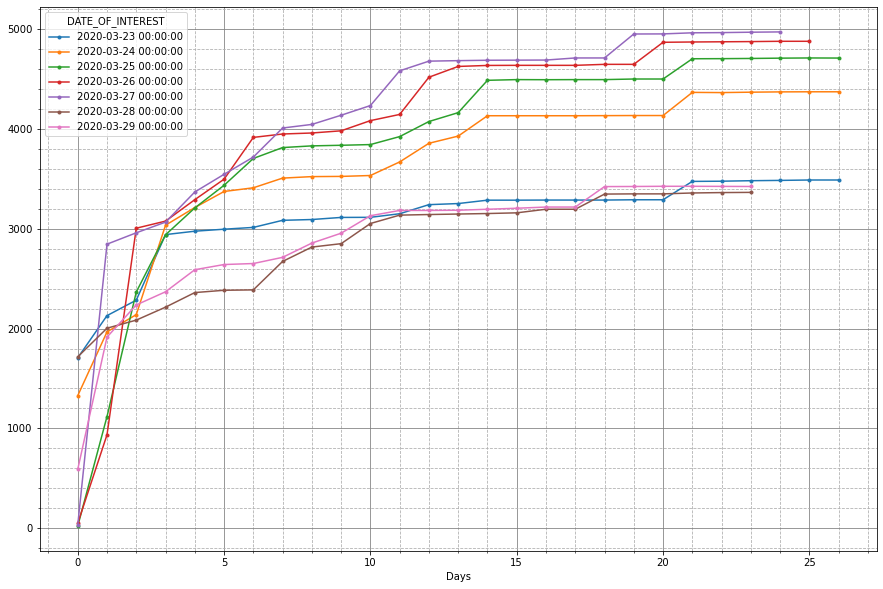

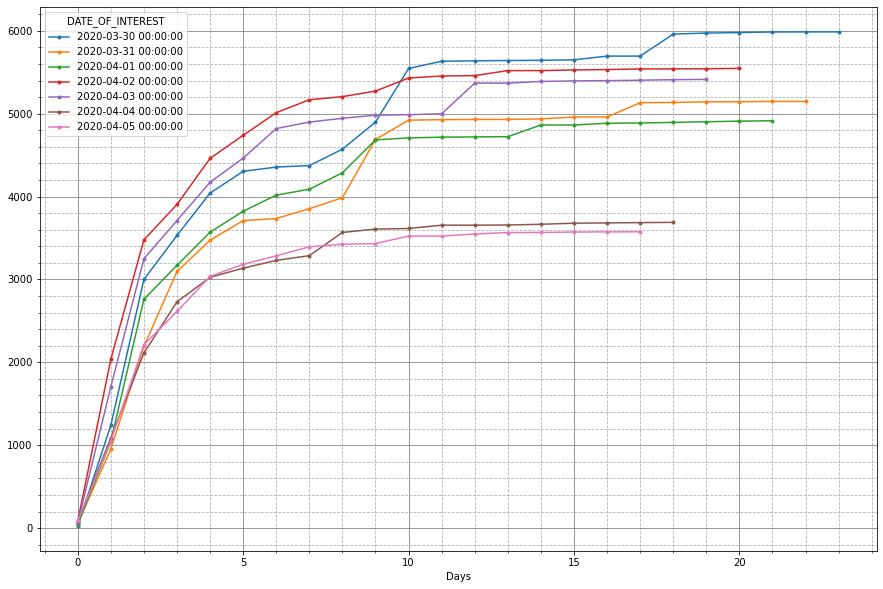

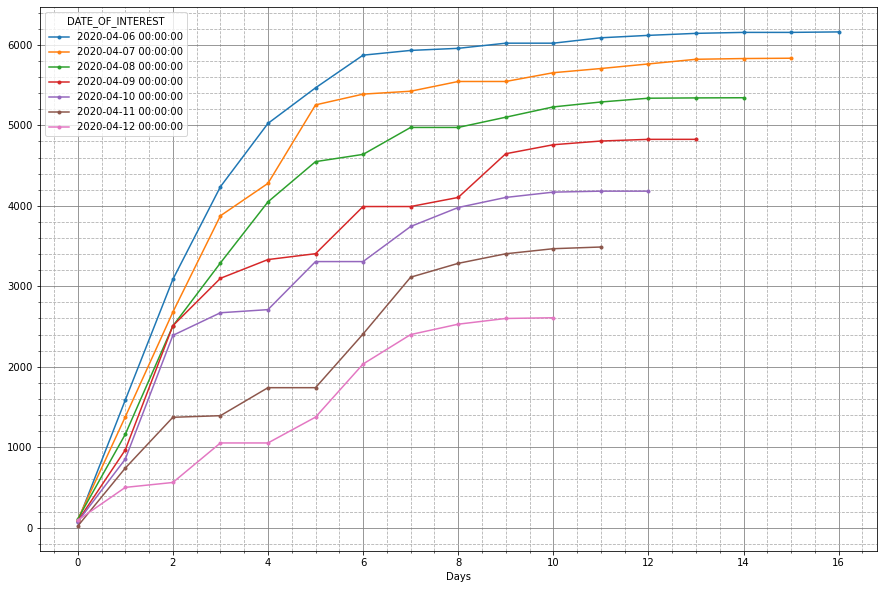

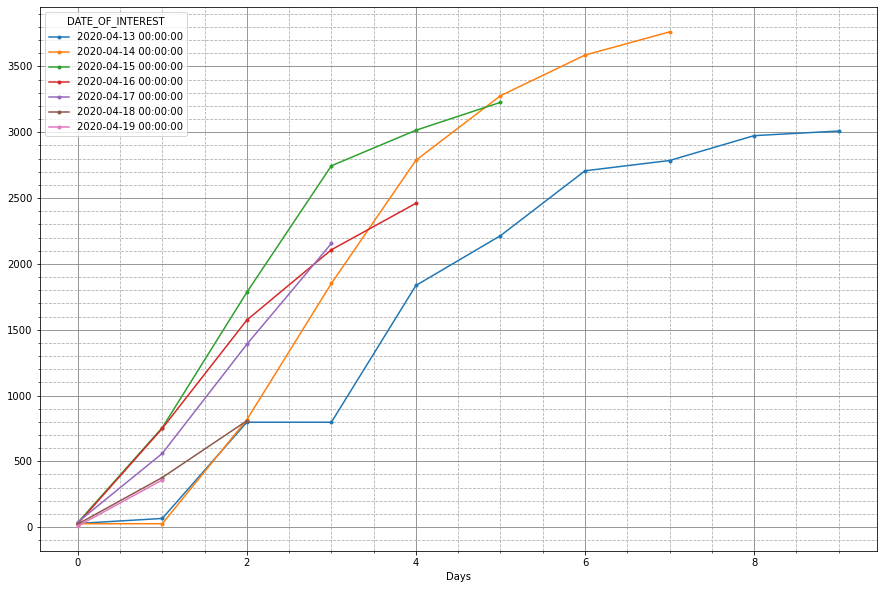

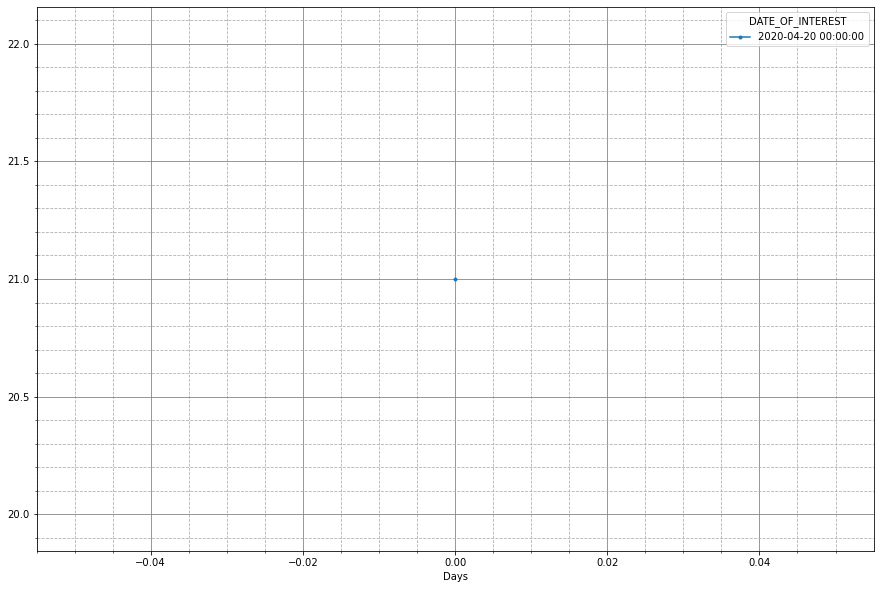

In [20]:
init = pd.to_datetime("2020-03-02")
delta = 7
for d in range(0, 60, delta):
    s = init +  pd.DateOffset(days=d)
    e = init +  pd.DateOffset(days=(d+delta))
    perday = hdat[(hdat["DATE_OF_INTEREST"] >= s) & (hdat["DATE_OF_INTEREST"] < e)] \
                 .pivot_table(index="Days",
                              columns="DATE_OF_INTEREST",
                              values="NEW_COVID_CASE_COUNT")
    if (len(perday) > 0):
        fig, ax = pltdflt(figsize=(15,10))
        perday.plot(style=".-", ax=ax)
        plt.show()

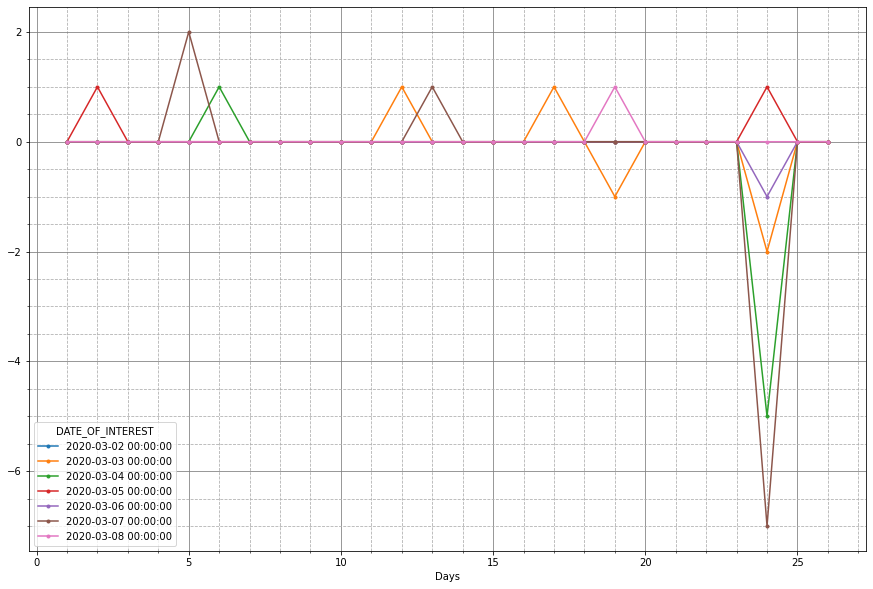

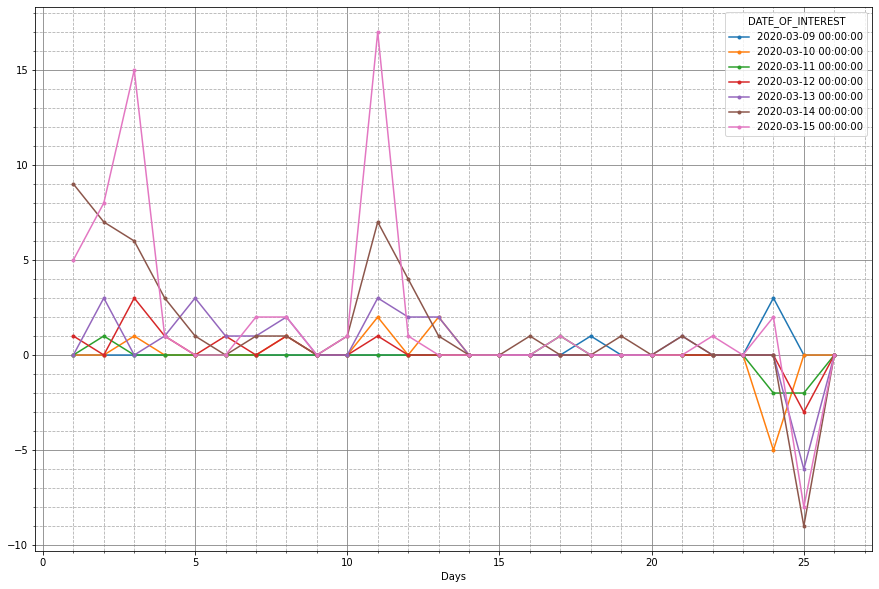

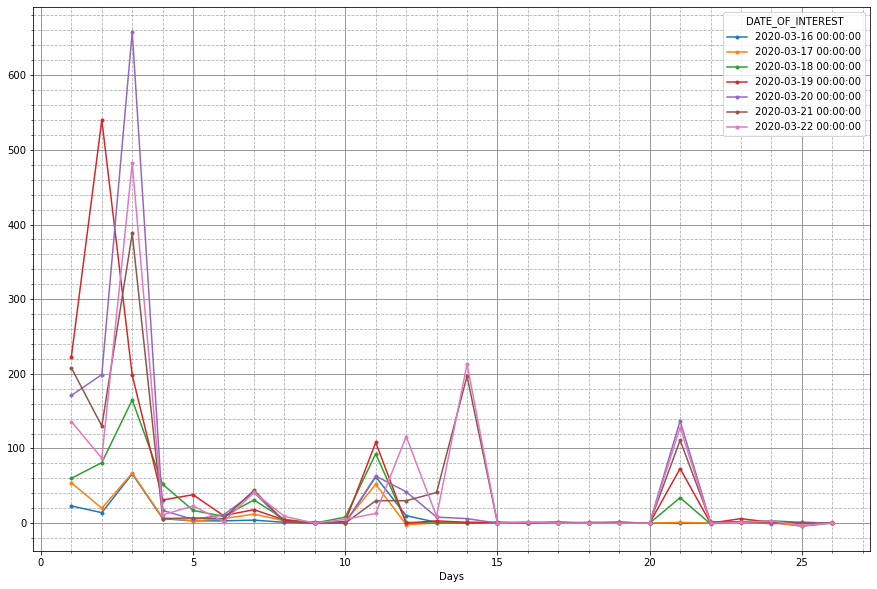

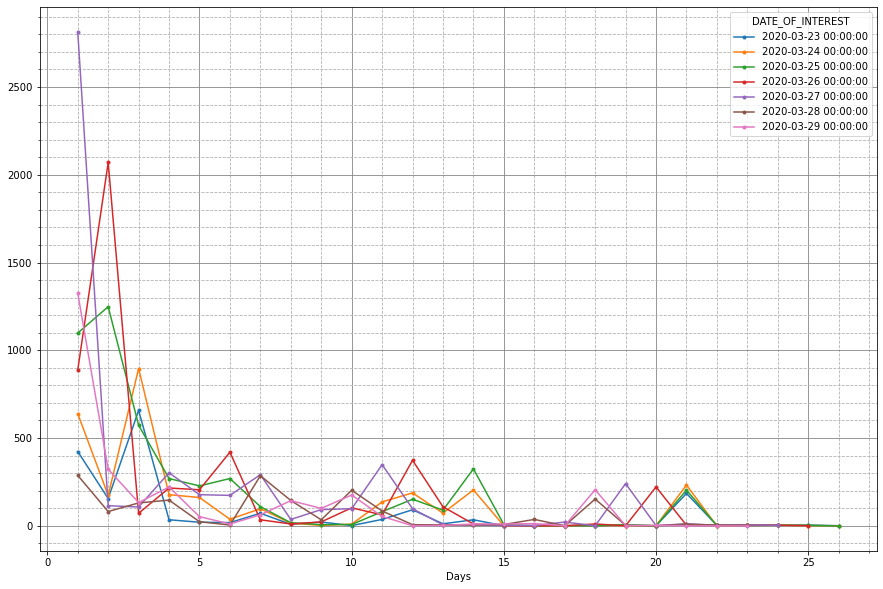

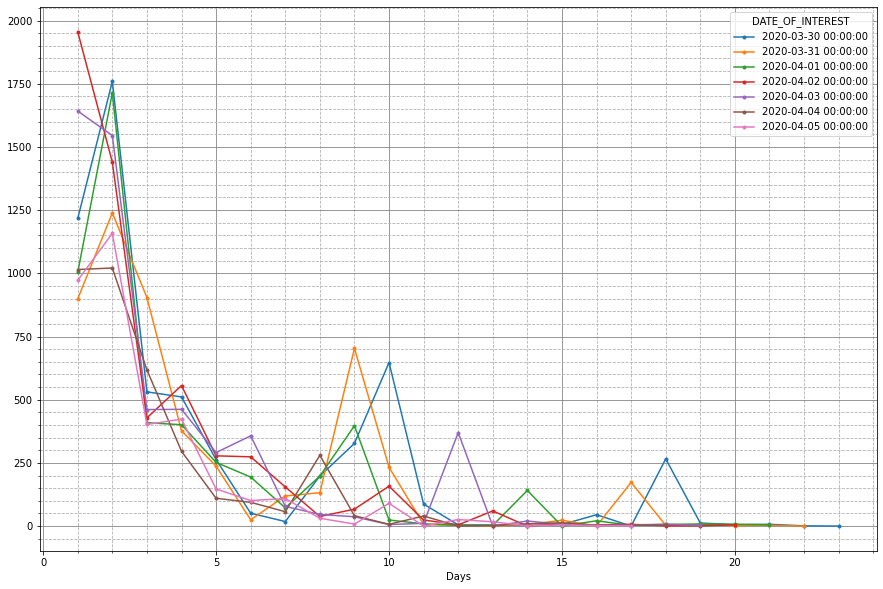

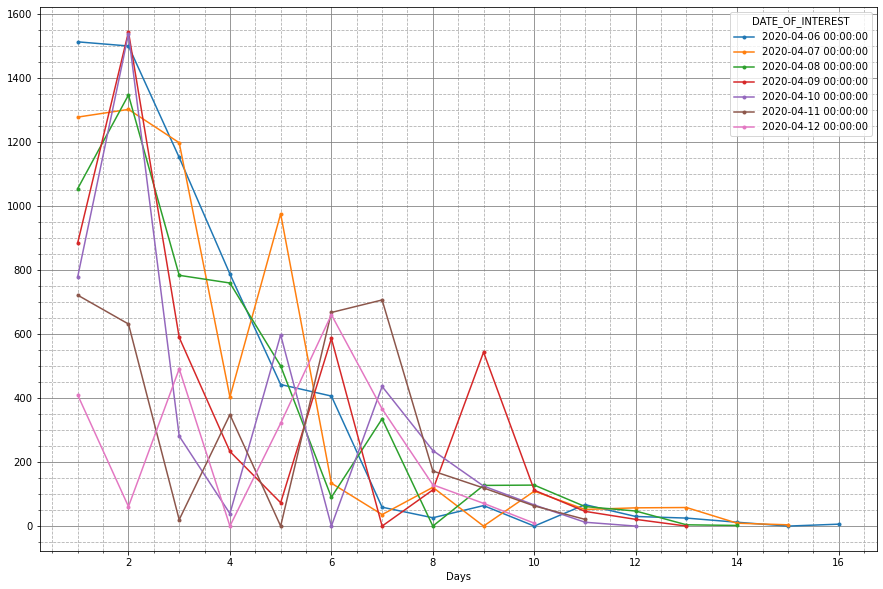

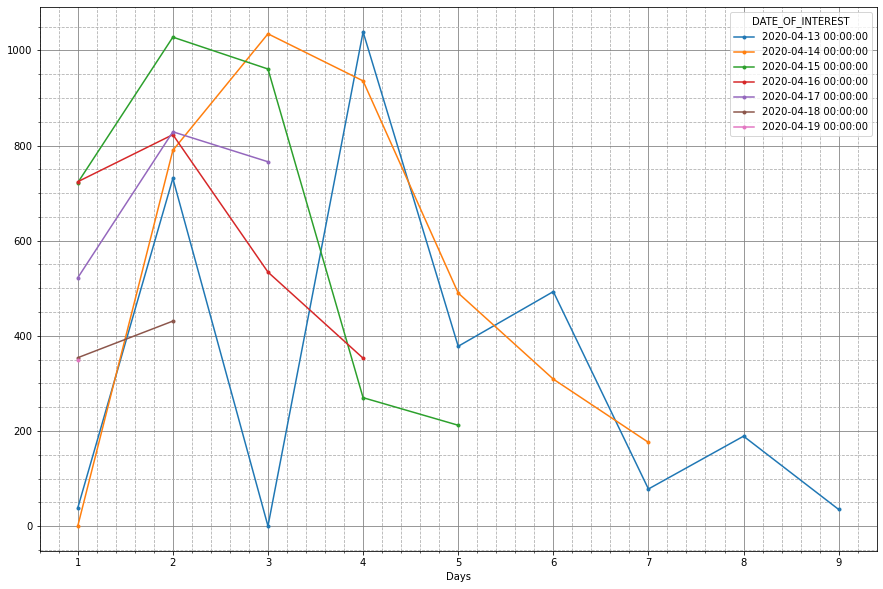

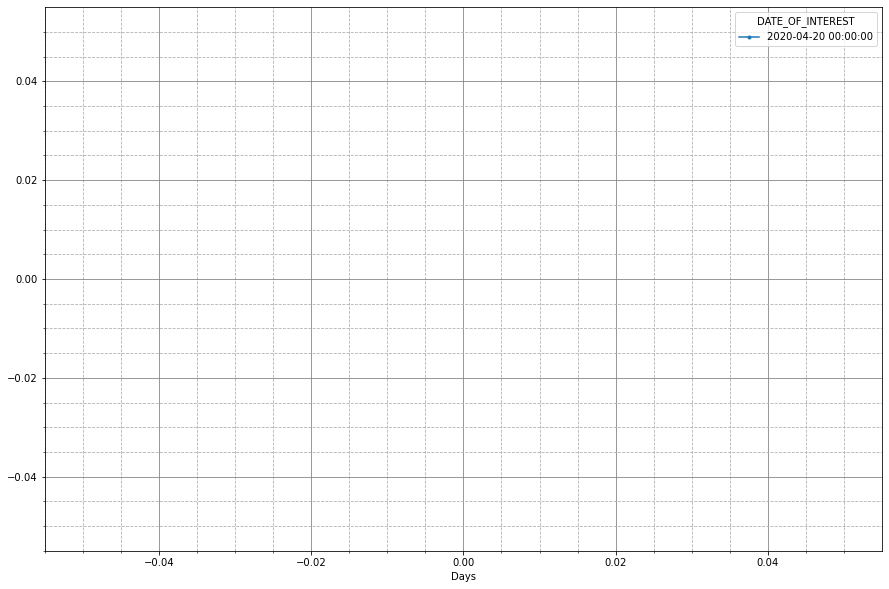

In [21]:
init = pd.to_datetime("2020-03-02")
delta = 7
for d in range(0, 60, delta):
    s = init +  pd.DateOffset(days=d)
    e = init +  pd.DateOffset(days=(d+delta))
    perday = hdat[(hdat["DATE_OF_INTEREST"] >= s) & (hdat["DATE_OF_INTEREST"] < e)] \
                 .pivot_table(index="Days",
                              columns="DATE_OF_INTEREST",
                              values="NEW_COVID_CASE_COUNT")
    perday = perday.diff()
    if (len(perday) > 0):
        fig, ax = pltdflt(figsize=(15,10))
        perday.plot(style=".-", ax=ax)
        plt.show()